# Deliverable 3 Analysis

## Understanding the dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [48]:
column_to_disease = {
    "ACCESS2_CrudePrev": "Current lack of health insurance among adults aged 18-64 years",
    "ARTHRITIS_CrudePrev": "Arthritis among adults aged >=18 years",
    "BINGE_CrudePrev": "Binge drinking among adults aged >=18 years",
    "BPHIGH_CrudePrev": "High blood pressure among adults aged >=18 years",
    "BPMED_CrudePrev": "Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure",
    "CANCER_CrudePrev": "Cancer (excluding skin cancer) among adults aged >=18 years",
    "CASTHMA_CrudePrev": "Current asthma among adults aged >=18 years",
    "CERVICAL_CrudePrev": "Cervical cancer screening among adult women aged 21-65 years",
    "CHD_CrudePrev": "Coronary heart disease among adults aged >=18 years",
    "CHECKUP_CrudePrev": "Visits to doctor for routine checkup within the past year among adults aged >=18 years",
    "CHOLSCREEN_CrudePrev": "Cholesterol screening among adults aged >=18 years",
    "COLON_SCREEN_CrudePrev": "Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",
    "COPD_CrudePrev": "Chronic obstructive pulmonary disease among adults aged >=18 years",
    "COREM_CrudePrev": "Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening",
    "COREW_CrudePrev": "Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",
    "CSMOKING_CrudePrev": "Current smoking among adults aged >=18 years",
    "DENTAL_CrudePrev": "Visits to dentist or dental clinic among adults aged >=18 years",
    "DEPRESSION_CrudePrev": "Depression among adults aged >=18 years",
    "DIABETES_CrudePrev": "Diagnosed diabetes among adults aged >=18 years",
    "DISABILITY_CrudePrev": "Any disability among adults aged >=18 years",
    "GHLTH_CrudePrev": "Fair or poor self-rated health status among adults aged >=18 years",
    "HEARING_CrudePrev": "Hearing disability among adults aged >=18 years",
    "HIGHCHOL_CrudePrev": "High cholesterol among adults aged >=18 years who have been screened in the past 5 years",
    "INDEPLIVE_CrudePrev": "Independent living disability among adults aged >=18 years",
    "KIDNEY_CrudePrev": "Chronic kidney disease among adults aged >=18 years",
    "LPA_CrudePrev": "No leisure-time physical activity among adults aged >=18 years",
    "MAMMOUSE_CrudePrev": "Mammography use among women aged 50-74 years",
    "MHLTH_CrudePrev": "Mental health not good for >=14 days among adults aged >=18 years",
    "MOBILITY_CrudePrev": "Mobility disability among adults aged >=18 years",
    "OBESITY_CrudePrev": "Obesity among adults aged >=18 years",
    "PHLTH_CrudePrev": "Physical health not good for >=14 days among adults aged >=18 years",
    "SELFCARE_CrudePrev": "Self-care disability among adults aged >=18 years",
    "SLEEP_CrudePrev": "Sleeping less than 7 hours among adults aged >=18 years",
    "STROKE_CrudePrev": "Stroke among adults aged >=18 years",
    "TEETHLOST_CrudePrev": "All teeth lost among adults aged >=65 years",
    "VISION_CrudePrev": "Vision disability among adults aged >=18 years",
    "COGNITION_CrudePrev": "Cognitive disability among adults aged >=18 years",
}

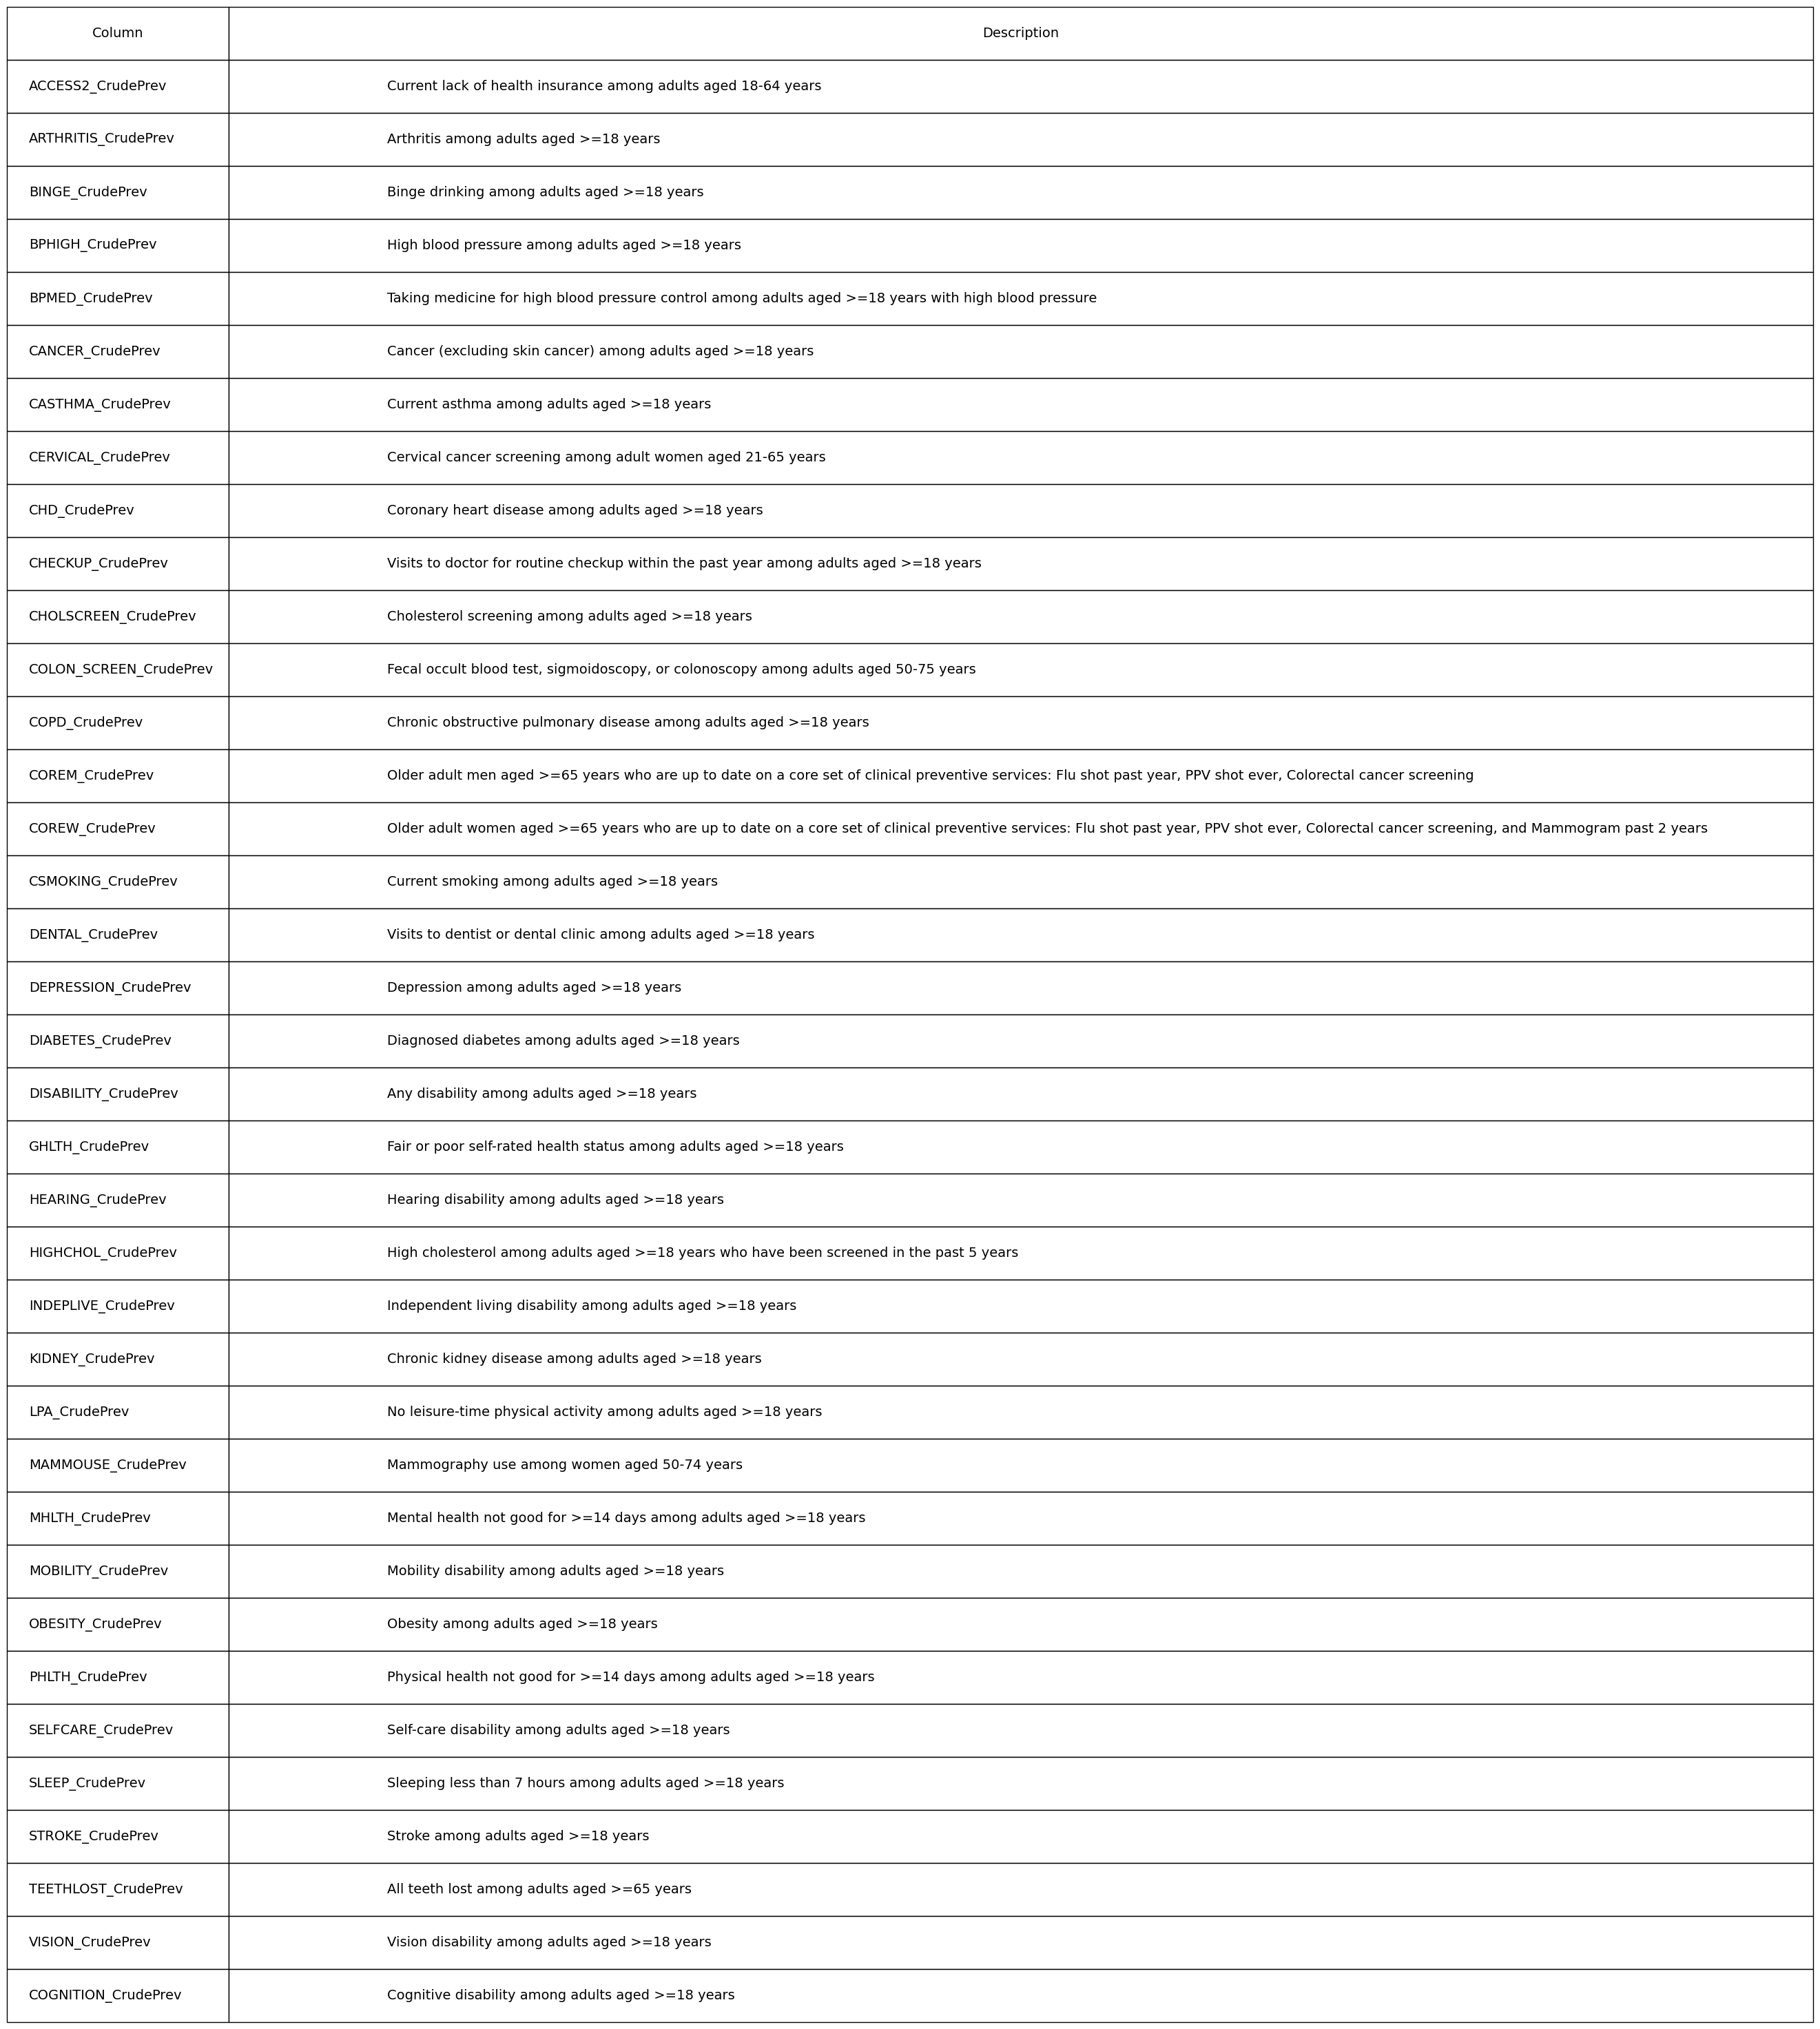

In [49]:
columns = ['Column', 'Description']
data = [(col, desc) for col, desc in column_to_disease.items()]

fig, ax = plt.subplots(figsize=(14, 20))  # Further increased figure size
ax.axis('tight')
ax.axis('off')

# Create the table with more spacious cells
table = ax.table(cellText=data, colLabels=columns, cellLoc='left', loc='center')

# Set font size for the cells
table.set_fontsize(14)

# Auto-adjust column widths
table.auto_set_column_width(col=list(range(len(columns))))

# Adjust row heights for more space
for pos, cell in table.get_celld().items():
    cell.set_height(0.05)  # Adjust cell height

plt.show()

## Highest AQI vs Lowest AQI areas in Boston

In [50]:
file_path = '../BostonCDCAQI.csv'
df = pd.read_csv(file_path)

In [51]:
highest_aqi_zip_code = df.loc[df['MeanAQI'].idxmax(), 'ZipCode']
lowest_aqi_zip_code = df.loc[df['MeanAQI'].idxmin(), 'ZipCode']

print('highest_aqi_zip_code: ' +  str(highest_aqi_zip_code))
print('lowest_aqi_zip_code: ' + str(lowest_aqi_zip_code))

highest_aqi_zip_code: 2118
lowest_aqi_zip_code: 2139


In [52]:
### add a map to the power point showing where both of these areas are situated

## AQI - CDC data corellation

In [53]:
aq_columns = ['MeanAQI', 'AvgMaxAQI']
health_metrics = df.columns[4:]  # Assuming health metrics start from the fifth column

# Calculate the correlation matrix
corr_matrix = df[aq_columns + list(health_metrics)].corr()

# Extract and display the correlations between AQI metrics and health metrics
correlations = corr_matrix.loc[aq_columns, health_metrics]

In [54]:
print(correlations.transpose())

                         MeanAQI  AvgMaxAQI
ACCESS2_CrudePrev       0.186275  -0.250063
ARTHRITIS_CrudePrev     0.261498  -0.187957
BINGE_CrudePrev         0.256889  -0.123239
BPHIGH_CrudePrev        0.165619  -0.028565
BPMED_CrudePrev         0.104009   0.078206
CANCER_CrudePrev        0.142101  -0.466372
CASTHMA_CrudePrev       0.191922  -0.339937
CERVICAL_CrudePrev      0.057734  -0.432475
CHD_CrudePrev           0.313530  -0.021008
CHECKUP_CrudePrev       0.071645  -0.010915
CHOLSCREEN_CrudePrev   -0.024682  -0.268129
COLON_SCREEN_CrudePrev -0.226528  -0.174282
COPD_CrudePrev          0.347405  -0.164740
CSMOKING_CrudePrev      0.391466  -0.060811
DENTAL_CrudePrev       -0.292749  -0.074216
DEPRESSION_CrudePrev    0.409928  -0.413566
DIABETES_CrudePrev      0.222201   0.068704
GHLTH_CrudePrev         0.305696  -0.091427
HIGHCHOL_CrudePrev      0.258266   0.054532
KIDNEY_CrudePrev        0.249956  -0.077541
LPA_CrudePrev           0.235133  -0.011984
MAMMOUSE_CrudePrev     -0.319776

In [55]:
# we see that AvgMaxAQI is not going to be a helpful metric. we disregard it

In [56]:
top_15_correlations_meanAQI = correlations.loc['MeanAQI'].sort_values(ascending=False).head(15)

top_15_correlations_meanAQI

DEPRESSION_CrudePrev    0.409928
CSMOKING_CrudePrev      0.391466
COPD_CrudePrev          0.347405
PHLTH_CrudePrev         0.325904
CHD_CrudePrev           0.313530
GHLTH_CrudePrev         0.305696
ARTHRITIS_CrudePrev     0.261498
HIGHCHOL_CrudePrev      0.258266
BINGE_CrudePrev         0.256889
MHLTH_CrudePrev         0.251783
KIDNEY_CrudePrev        0.249956
STROKE_CrudePrev        0.237206
LPA_CrudePrev           0.235133
DIABETES_CrudePrev      0.222201
TEETHLOST_CrudePrev     0.218312
Name: MeanAQI, dtype: float64

## Regression Analysis of 5 health metrics with the highest corellation with air quality

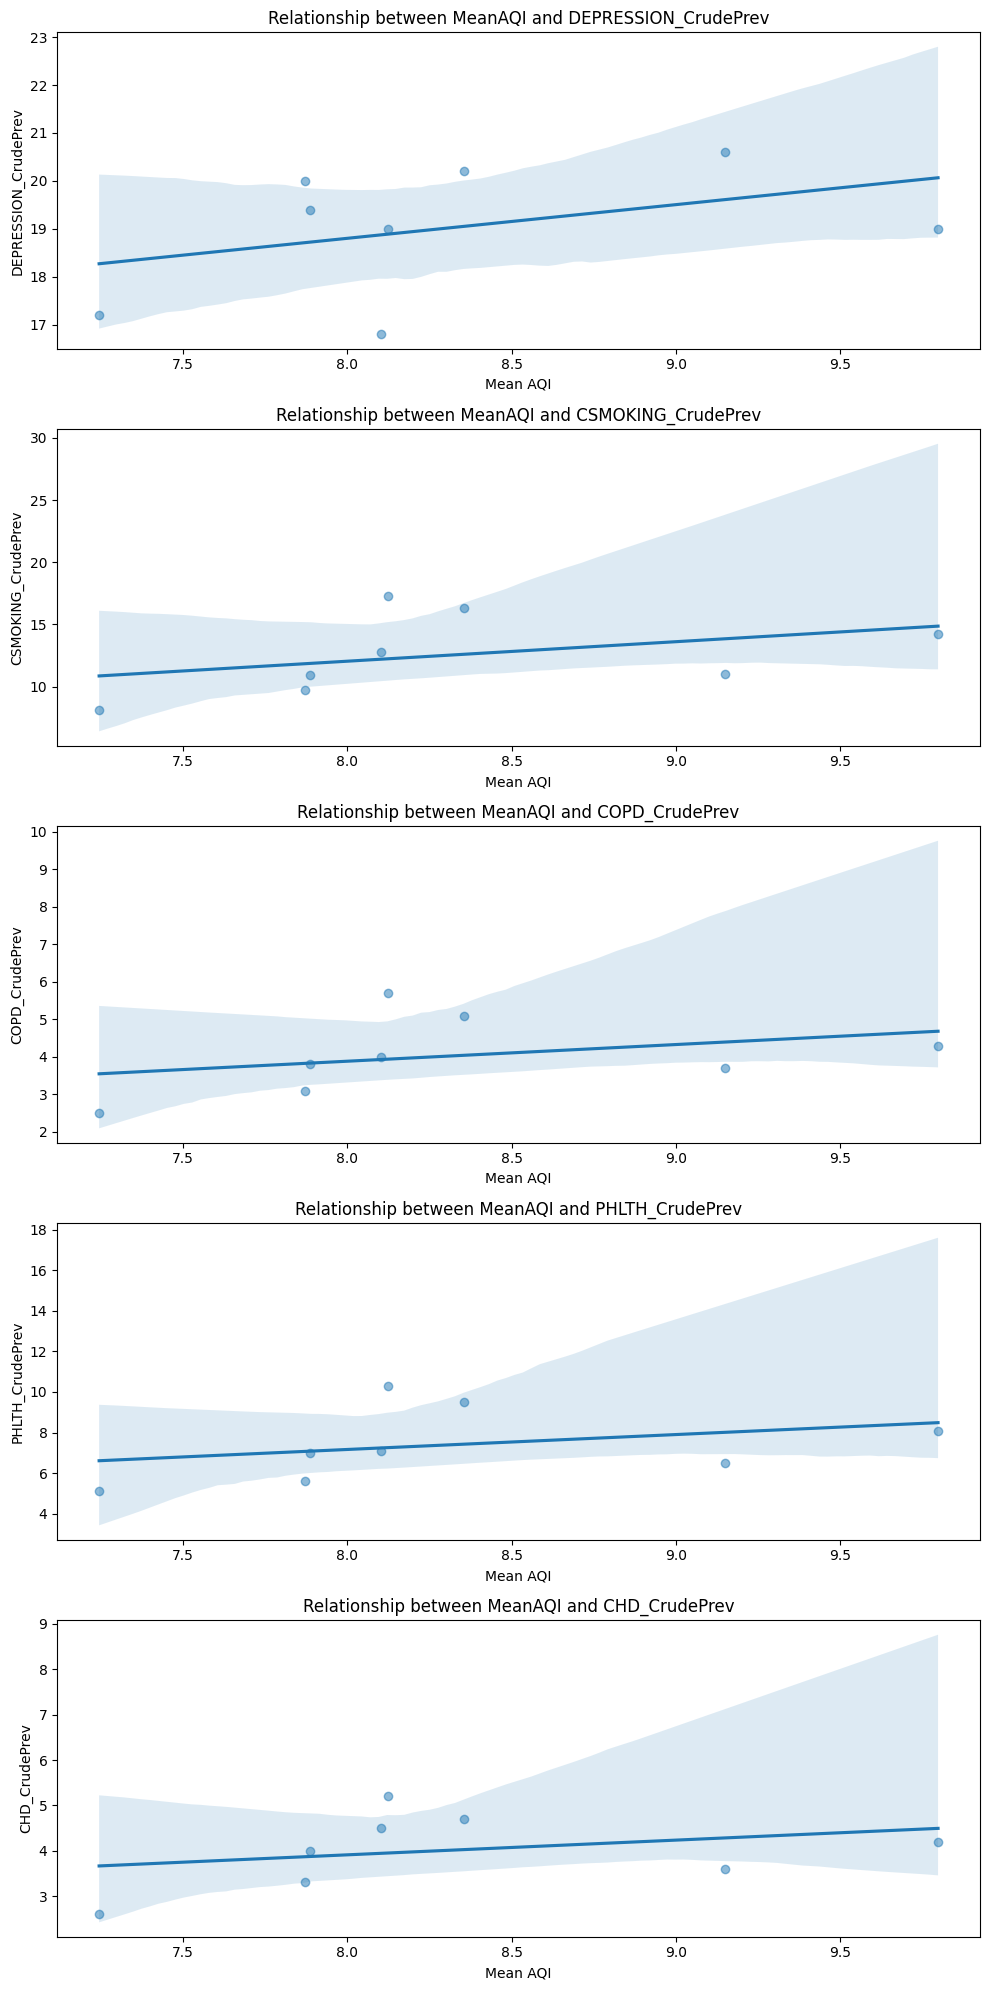

In [57]:
import seaborn as sns

# Selecting the specific health measures
selected_measures = ['DEPRESSION_CrudePrev', 'CSMOKING_CrudePrev', 'COPD_CrudePrev', 'PHLTH_CrudePrev', 'CHD_CrudePrev']

# Creating subplots for each health measure
fig, axs = plt.subplots(nrows=len(selected_measures), ncols=1, figsize=(10, 20))

# Plotting regression lines for each measure against MeanAQI
for i, measure in enumerate(selected_measures):
    sns.regplot(x='MeanAQI', y=measure, data=df, ax=axs[i], scatter_kws={'alpha':0.5})
    axs[i].set_title(f'Relationship between MeanAQI and {measure}')
    axs[i].set_xlabel('Mean AQI')
    axs[i].set_ylabel(measure)

# Adjust layout
plt.tight_layout()
plt.show()

## How this relates to census

In [58]:
census = pd.read_csv('../CensusData.csv')

In [59]:
census.columns

Index(['Unnamed: 0', 'Zip code', 'Total population', 'Average Household Size',
       'Percentage of Foreign Born Residents',
       'Percentage of Non-English Speakers',
       'Percentage of population aged 5 years and over who speak Spanish at home',
       'Percentage of population aged 5 years and over who speak an Indo-european other than Spanish at home',
       'Percentage of population aged 5 years and over who speak an Asian and Pacific Islander language',
       'Percentage of population aged 5 years and over who speak other language at home',
       'Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree',
       'Percentage of population with American ancestry',
       'Percentage of population with Arab ancestry',
       'Percentage of population with Dutch ancestry',
       'Percentage of population with English ancestry',
       'Percentage of population with French ancestry',
       'Percentage of population with German ancestry',
       'Perc

In [60]:
census_relevant_columns = census[['Zip code', 
                                     'Percentage of white people', 
                                     'Percentage of Black or African American people', 
                                     'Percentage of Asian people',  
                                     'Percentage of Hispanic or Latino People']]

In [61]:
# Renaming the 'Zip code' column to 'ZipCode' for consistent merging
census_relevant_columns.rename(columns={'Zip code': 'ZipCode'}, inplace=True)

# Merging with the original health data dataframe on ZipCode
merged_df = df.merge(census_relevant_columns, on='ZipCode', how='inner')

# Displaying the first few rows of the merged dataframe
merged_df.head()

/var/folders/h9/7_8cr2zj6_l9fjgdg1nlw7tc0000gn/T/ipykernel_70404/1129797386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_relevant_columns.rename(columns={'Zip code': 'ZipCode'}, inplace=True)


ZipCode   MeanAQI  AvgMaxAQI  TotalPopulation  ACCESS2_CrudePrev  \
0     2111  8.101017  37.325602             7383                7.8   
1     2118  9.796988  46.486448            26498                8.9   
2     2124  8.121950  22.361693            47783               10.8   
3     2127  9.149951  23.585692            31799                6.4   
4     2128  8.355616  22.265957            40508               16.3   

   ARTHRITIS_CrudePrev  BINGE_CrudePrev  BPHIGH_CrudePrev  BPMED_CrudePrev  \
0                 16.1             16.7              23.0             72.6   
1                 16.6             19.7              23.6             66.9   
2                 21.9             15.8              31.5             73.3   
3                 15.7             22.8              19.0             66.4   
4                 17.5             20.1              22.4             65.8   

   CANCER_CrudePrev  ...  MHLTH_CrudePrev  OBESITY_CrudePrev  PHLTH_CrudePrev  \
0               4.1  ...             13.6               15.8              7.1   
1               4.1  ...             14.7               22.7              8.1   
2               5.0  ...             16.2               28.4             10.3   
3               4.9  ...             14.2               19.0              6.5   
4               4.5  ...             16.0               24.4              9.5   

   SLEEP_CrudePrev  STROKE_CrudePrev  TEETHLOST_CrudePrev  \
0             32.0               2.3                 11.2   
1             33.1               2.4                 12.7   
2             38.7               3.5                 17.8   
3             29.0               1.8                  8.9   
4             33.0               2.4                 17.8   

   Percentage of white people  Percentage of Black or African American people  \
0                        40.7                                             2.1   
1                        49.8                                            17.4   
2                        21.8                                            53.4   
3                        79.3                                             5.0   
4                        54.9                                             2.9   

   Percentage of Asian people  Percentage of Hispanic or Latino People  
0                        48.3                                      8.8  
1                        16.1                                     18.0  
2                         7.7                                     18.5  
3                         6.5                                      9.5  
4                         4.5                                     55.5  

[5 rows x 36 columns]

In [62]:
column_rename_map = {
    'Percentage of white people': 'White Perc', 
    'Percentage of Black or African American people': 'Black/Afr Am Perc', 
    'Percentage of Asian people': 'Asian Perc',  
    'Percentage of Hispanic or Latino People': 'Hisp/Lat Perc'
}

# Applying the renaming
merged_df.rename(columns=column_rename_map, inplace=True)

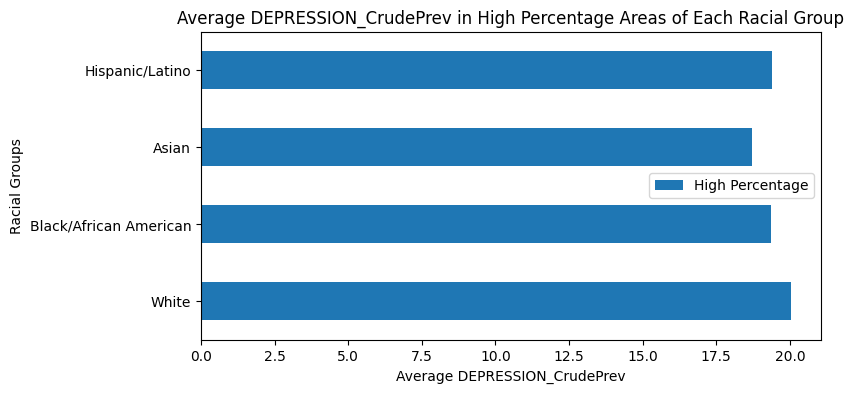

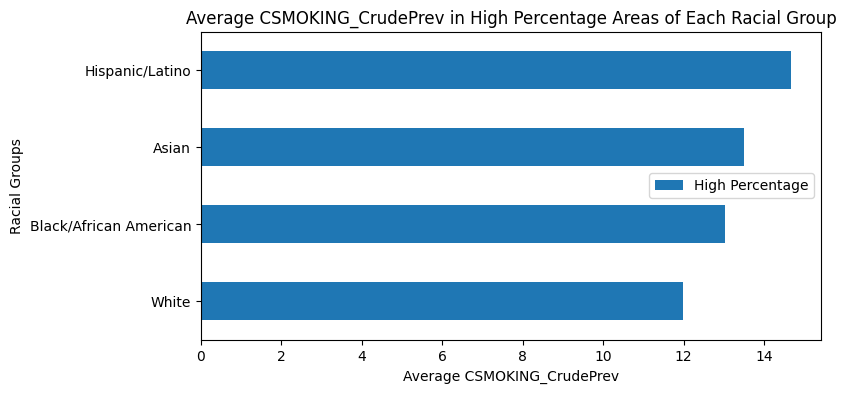

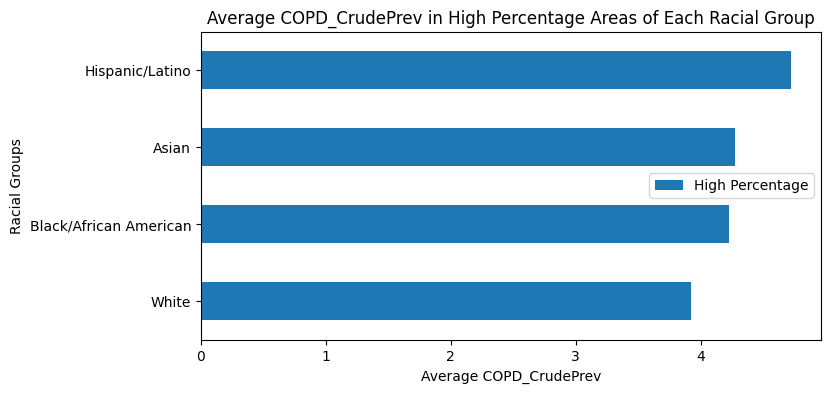

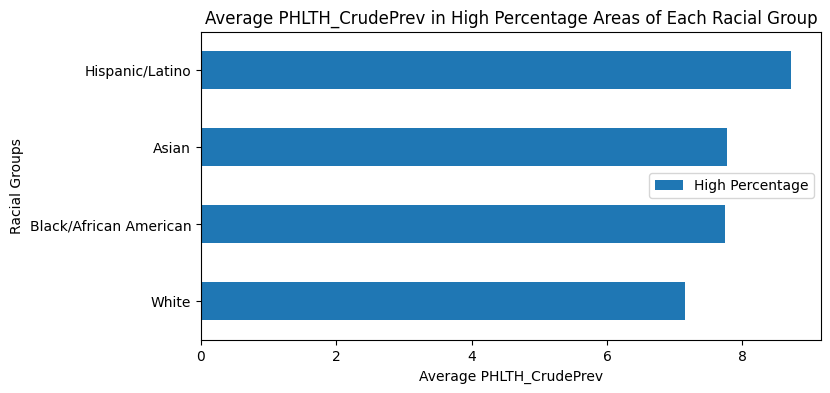

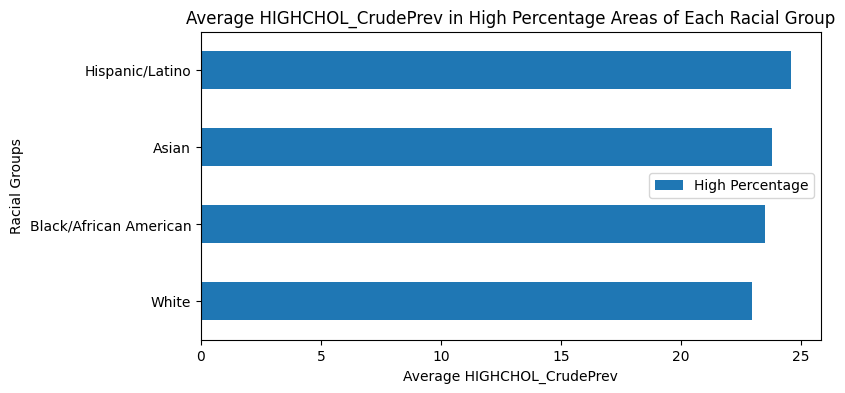

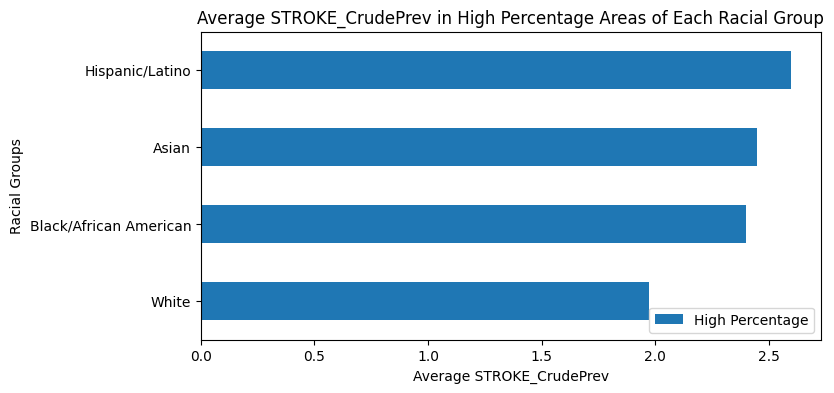

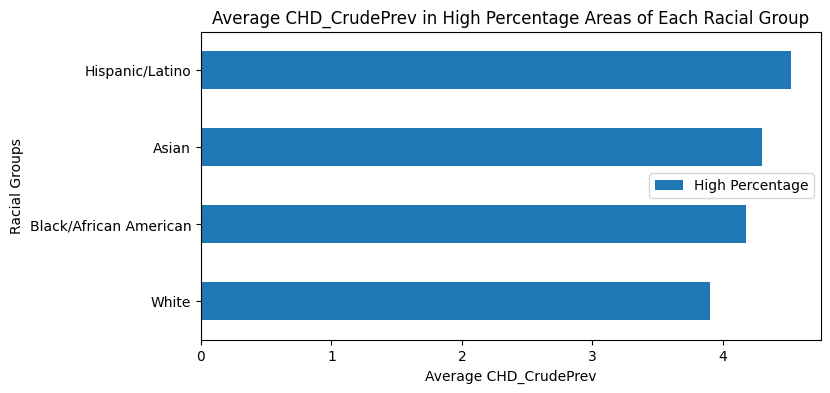

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the mapping of original group names to bar titles
group_name_mapping = {
    'White Perc': 'White',
    'Black/Afr Am Perc': 'Black/African American',
    'Asian Perc': 'Asian',
    'Hisp/Lat Perc': 'Hispanic/Latino'
}

# Get the actual column names from the DataFrame
racial_groups = [col for col in merged_df.columns if col in group_name_mapping]

def calculate_average_metrics_for_groups(metric):
    averages = {}
    for group in racial_groups:
        # Determine the median percentage for the racial group
        median_percentage = merged_df[group].median()
        
        # Calculate average health metric for areas with high and low percentages of the racial group
        high_avg = merged_df[merged_df[group] >= median_percentage][metric].mean()

        averages[group] = {'High Percentage': high_avg}
    
    return averages

health_metrics_to_analyze = [
    'DEPRESSION_CrudePrev', 
    'CSMOKING_CrudePrev', 
    'COPD_CrudePrev', 
    'PHLTH_CrudePrev', 
    'HIGHCHOL_CrudePrev',
    'STROKE_CrudePrev',
    'CHD_CrudePrev'
]

plot_size = (8, 4)

for metric in health_metrics_to_analyze:
    averages = calculate_average_metrics_for_groups(metric)
    averages_df = pd.DataFrame(averages).transpose()

    # Creating the horizontal bar plot
    plot = averages_df.plot(kind='barh', figsize=plot_size)
    
    # Set the bar titles using the mapping
    group_titles = [group_name_mapping[group] for group in racial_groups]
    plt.yticks(range(len(racial_groups)), group_titles)
    
    plt.title(f'Average {metric} in High Percentage Areas of Each Racial Group')
    plt.xlabel(f'Average {metric}')
    plt.ylabel('Racial Groups')
    plt.show()


In [64]:
## in the power point, talk about how this supports the claim that marginalized communities are dealing more intensely with the effects of air quality

In [65]:
census_relevant_columns = census[['Zip code',
    'Percentage of people commuting to work', 
    'Mean travel time to work (minutes)', 
    'Percentage of population commuting to work by car, truck or van -- drove alone',
    'Percentage of population working from home']
    ]

In [66]:
# Renaming the 'Zip code' column to 'ZipCode' for consistent merging
census_relevant_columns.rename(columns={'Zip code': 'ZipCode'}, inplace=True)

# Merging with the original health data dataframe on ZipCode
merged_df = df.merge(census_relevant_columns, on='ZipCode', how='inner')

# Displaying the first few rows of the merged dataframe
merged_df.head()

/var/folders/h9/7_8cr2zj6_l9fjgdg1nlw7tc0000gn/T/ipykernel_70404/1129797386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_relevant_columns.rename(columns={'Zip code': 'ZipCode'}, inplace=True)


ZipCode   MeanAQI  AvgMaxAQI  TotalPopulation  ACCESS2_CrudePrev  \
0     2111  8.101017  37.325602             7383                7.8   
1     2118  9.796988  46.486448            26498                8.9   
2     2124  8.121950  22.361693            47783               10.8   
3     2127  9.149951  23.585692            31799                6.4   
4     2128  8.355616  22.265957            40508               16.3   

   ARTHRITIS_CrudePrev  BINGE_CrudePrev  BPHIGH_CrudePrev  BPMED_CrudePrev  \
0                 16.1             16.7              23.0             72.6   
1                 16.6             19.7              23.6             66.9   
2                 21.9             15.8              31.5             73.3   
3                 15.7             22.8              19.0             66.4   
4                 17.5             20.1              22.4             65.8   

   CANCER_CrudePrev  ...  MHLTH_CrudePrev  OBESITY_CrudePrev  PHLTH_CrudePrev  \
0               4.1  ...             13.6               15.8              7.1   
1               4.1  ...             14.7               22.7              8.1   
2               5.0  ...             16.2               28.4             10.3   
3               4.9  ...             14.2               19.0              6.5   
4               4.5  ...             16.0               24.4              9.5   

   SLEEP_CrudePrev  STROKE_CrudePrev  TEETHLOST_CrudePrev  \
0             32.0               2.3                 11.2   
1             33.1               2.4                 12.7   
2             38.7               3.5                 17.8   
3             29.0               1.8                  8.9   
4             33.0               2.4                 17.8   

   Percentage of people commuting to work  Mean travel time to work (minutes)  \
0                                    15.6                                20.6   
1                                    25.5                                27.3   
2                                    28.4                                36.7   
3                                    30.7                                27.7   
4                                    46.1                                32.2   

   Percentage of population commuting to work by car, truck or van -- drove alone  \
0                                               13.8                                
1                                               23.8                                
2                                               45.4                                
3                                               36.2                                
4                                               30.0                                

   Percentage of population working from home  
0                                        14.9  
1                                        13.0  
2                                        10.1  
3                                        16.5  
4                                        12.2  

[5 rows x 36 columns]

In [67]:
column_rename_map = {
    'Percentage of people commuting to work': 'Perc. commut. to work', 
    'Mean travel time to work (minutes)': 'Avg trav. time to work', 
    'Percentage of population commuting to work by car, truck or van -- drove alone': 'Perc. commut. work by car',  
    'Percentage of population working from home': 'Perc. work from home'
}

# Applying the renaming
merged_df.rename(columns=column_rename_map, inplace=True)

In [68]:
health_metrics_to_analyze = [
    'DEPRESSION_CrudePrev',
    'COPD_CrudePrev',  
    'CANCER_CrudePrev',
    'CASTHMA_CrudePrev'
]

commuting_columns = ['Perc. commut. to work', 
                    'Avg trav. time to work', 
                    'Perc. commut. work by car',  
                    'Perc. work from home']

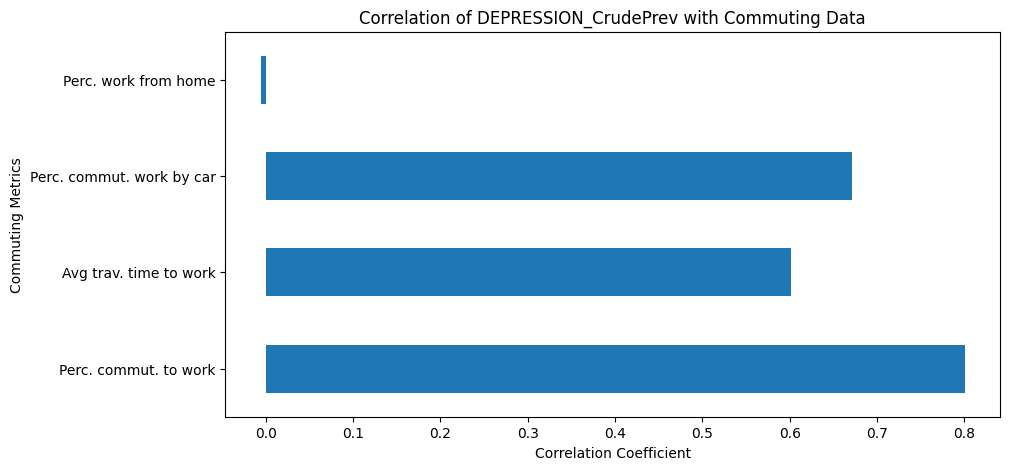

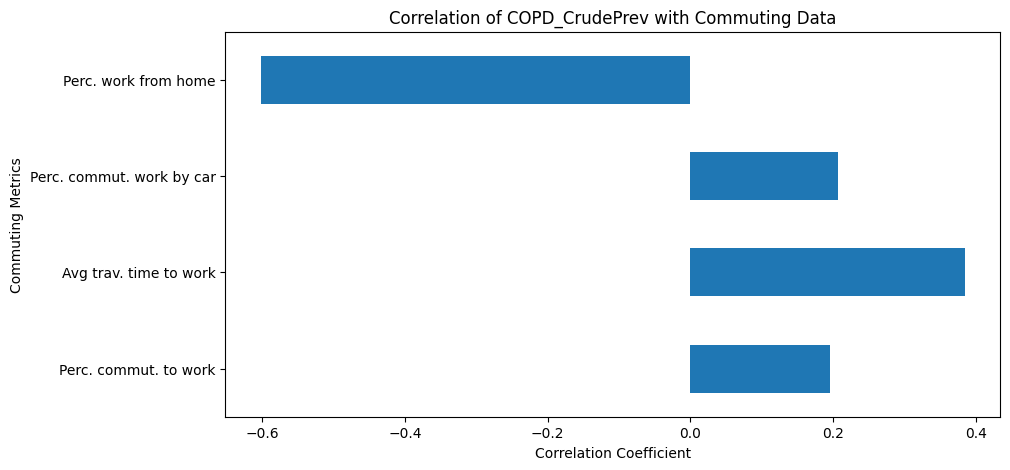

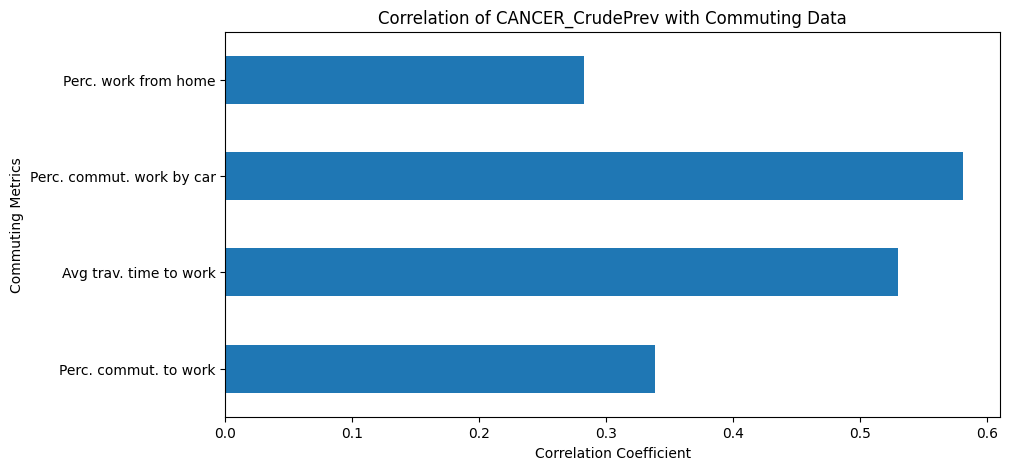

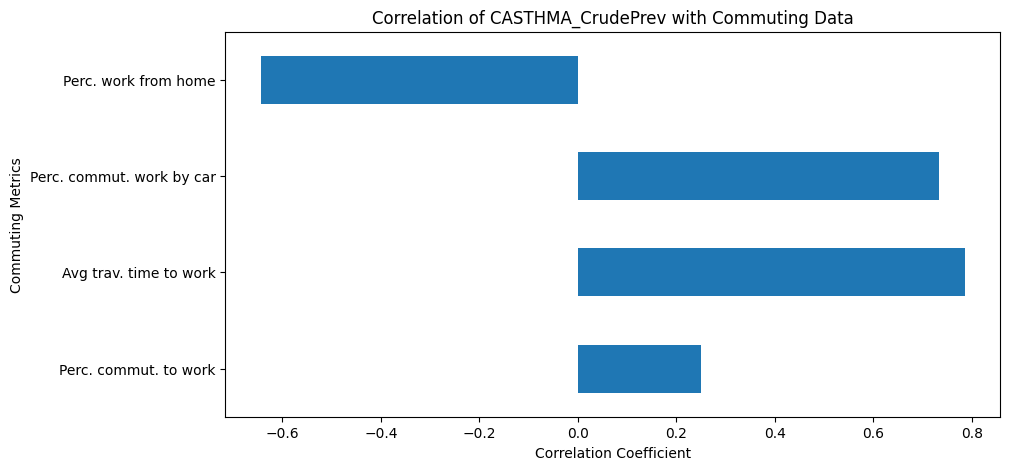

In [69]:
import matplotlib.pyplot as plt

# Assuming merged_commuting_health_df is the merged dataframe of health data and commuting data
correlation_matrix = merged_df[health_metrics_to_analyze + commuting_columns].corr()

# Extracting the correlations between health metrics and commuting columns
correlation_subset = correlation_matrix.loc[health_metrics_to_analyze, commuting_columns]

# Plotting the correlations as horizontal bar charts
for health_metric in health_metrics_to_analyze:
    correlations = correlation_subset.loc[health_metric]
    correlations.plot(kind='barh', figsize=(10, 5))
    plt.title(f'Correlation of {health_metric} with Commuting Data')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Commuting Metrics')
    plt.show()
